In [3]:
from __future__ import division, print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import arff, pandas as pd, numpy as np
from IPython.display import display, HTML
from sklearn.preprocessing import LabelBinarizer
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
#from efficient_apriori import apriori
from apyori import apriori
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd
import numpy as np
import itertools

%matplotlib inline

plt.style.use('bmh')

### GREEN DATASET

#### Loading the data

In [4]:
green_df = pd.read_csv("./clean_data/clean_green.csv")

In [5]:
green_df.info()
green_df.drop(['consensus'], axis='columns' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 69 columns):
cervix_area                    98 non-null float64
os_area                        98 non-null float64
walls_area                     98 non-null float64
speculum_area                  98 non-null float64
artifacts_area                 98 non-null float64
cervix_artifacts_area          98 non-null float64
os_artifacts_area              98 non-null float64
walls_artifacts_area           98 non-null float64
speculum_artifacts_area        98 non-null float64
cervix_specularities_area      98 non-null float64
os_specularities_area          98 non-null float64
walls_specularities_area       98 non-null float64
speculum_specularities_area    98 non-null float64
specularities_area             98 non-null float64
area_h_max_diff                98 non-null float64
rgb_cervix_r_mean              98 non-null float64
rgb_cervix_r_std               98 non-null float64
rgb_cervix_r_mean_minus_std   

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_ellipse_total,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5
0,0.344647,0.003080,0.047522,0.288216,0.178585,0.016564,0.000000,0.043500,0.010149,0.000133,...,0.357890,85.474311,0.265933,0.346294,1.0,0.0,0.0,1.0,1.0,1.0
1,0.165329,0.000000,0.048236,0.504736,0.502783,0.007012,0.000000,0.097405,0.973837,0.004055,...,0.184803,124.794129,1.000000,0.283059,0.0,0.0,0.0,0.0,0.0,0.0
2,0.457010,0.001681,0.242888,0.212859,0.000000,0.000000,0.000000,0.000000,0.000000,0.001756,...,0.496596,94.948697,0.518740,0.419375,1.0,0.0,0.0,1.0,0.0,0.0
3,0.513244,0.005711,0.213781,0.251819,0.079795,0.000000,0.000000,0.017594,0.007208,0.001288,...,0.532073,74.221670,0.347202,0.361672,1.0,1.0,0.0,1.0,1.0,1.0
4,0.390319,0.009454,0.272884,0.373487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000196,...,0.407600,61.546536,0.437852,0.673196,1.0,0.0,0.0,1.0,1.0,1.0
5,0.553354,0.009472,0.094315,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005477,...,0.556668,42.338553,0.558539,0.310021,1.0,0.0,0.0,1.0,1.0,1.0
6,0.543618,0.005927,0.329241,0.086847,0.052831,0.097183,0.000288,0.000000,0.000000,0.003289,...,0.550576,56.534053,0.292185,0.269308,1.0,0.0,0.0,1.0,1.0,1.0
7,0.510726,0.010724,0.113227,0.211889,0.084259,0.162905,0.294737,0.000000,0.000000,0.006444,...,0.526992,73.746836,0.415107,0.337639,0.0,0.0,1.0,1.0,1.0,0.0
8,0.512960,0.017649,0.251531,0.178131,0.000000,0.000000,0.000000,0.000000,0.000000,0.007818,...,0.509502,39.771961,0.365340,0.461574,0.0,1.0,0.0,1.0,1.0,1.0
9,0.565021,0.010130,0.340475,0.033007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000775,...,0.580498,100.080224,0.275810,0.295973,1.0,1.0,1.0,1.0,1.0,1.0


In [18]:
import pandas as pd
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori
 
oht = OnehotTransactions()
oht_ary = oht.fit(green_df).transform(green_df)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
print (df)           
 
frequent_itemsets = apriori(df, min_support=0.25, use_colnames=True)
print (frequent_itemsets)
 
from mlxtend.frequent_patterns import association_rules
 
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
print(len(frequent_itemsets))
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0)
print (rules)
 
support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])
lift =rules.as_matrix(columns=['lift'])

        0      1      2      3      4      5      :      _      a      b  \
0   False  False  False  False  False  False  False   True   True  False   
1   False  False  False  False  False  False  False   True   True  False   
2   False  False  False  False  False  False  False   True   True  False   
3   False  False  False  False  False  False  False   True   True  False   
4   False  False  False  False  False  False  False   True   True  False   
5   False  False  False  False  False  False  False   True   True  False   
6   False  False  False  False  False  False  False   True   True  False   
7   False  False  False  False  False  False  False   True   True  False   
8   False  False  False  False  False  False  False   True   True  False   
9   False  False  False  False  False  False  False   True   True  False   
10  False  False  False  False  False  False  False   True   True  False   
11  False  False  False  False  False  False  False   True   True  False   
12  False  F

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\mlxtend\preprocessing\onehot.py:66: DeprecationWarning: OnehotTransactions has been deprecated and will be removed in future. Please use TransactionEncoder instead.
  warnings.warn(msg, DeprecationWarning)
c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [19]:
print(len(rules)) 

4768


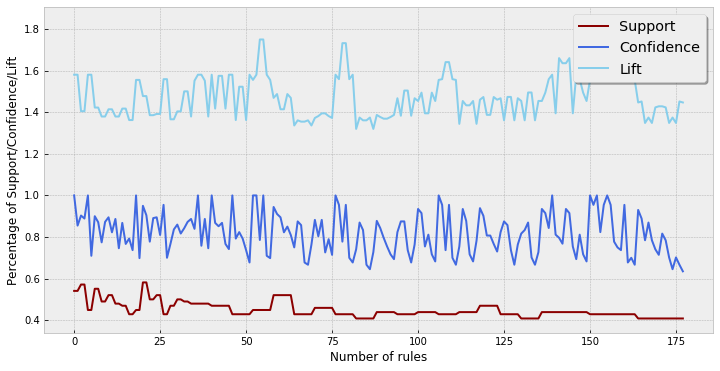

In [16]:
# Create plots with pre-defined labels.
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(np.arange(178), support, color= "darkred", label= 'Support')
ax.plot(np.arange(178), confidence,color= "royalblue",label='Confidence')
ax.plot(np.arange(178), lift ,color= "skyblue",label='Lift')

plt.xlabel('Number of rules')
plt.ylabel('Percentage of Support/Confidence/Lift')
        

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
#legend.get_frame().set_facecolor('C0')

plt.show()

[Text(0, 0.5, 'Lift'), Text(0.5, 0, 'Support')]

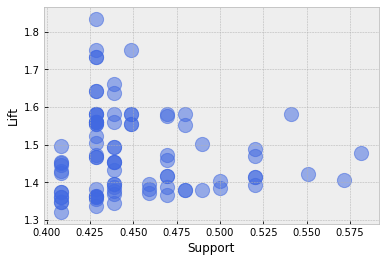

In [17]:
import seaborn as sns
# library & dataset
import seaborn as sns

# use the function regplot to make a scatterplot
ax= sns.regplot(x= support , y= lift, fit_reg=False, scatter_kws={"color":"royalblue","alpha":0.3,"s":200})
ax.set(xlabel= 'Support',ylabel='Lift')
#sns.plt.show()
 
# Without regression fit:
#sns.regplot(x=df["sepal_length"], y=df["sepal_width"], fit_reg=False)
#sns.plt.show()


### HINSEL DATASET

In [11]:
hinsel_df = pd.read_csv("./clean_data/clean_green.csv")

In [12]:
hinsel_df.info()
hinsel_df.drop(['consensus'], axis='columns' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 69 columns):
cervix_area                    98 non-null float64
os_area                        98 non-null float64
walls_area                     98 non-null float64
speculum_area                  98 non-null float64
artifacts_area                 98 non-null float64
cervix_artifacts_area          98 non-null float64
os_artifacts_area              98 non-null float64
walls_artifacts_area           98 non-null float64
speculum_artifacts_area        98 non-null float64
cervix_specularities_area      98 non-null float64
os_specularities_area          98 non-null float64
walls_specularities_area       98 non-null float64
speculum_specularities_area    98 non-null float64
specularities_area             98 non-null float64
area_h_max_diff                98 non-null float64
rgb_cervix_r_mean              98 non-null float64
rgb_cervix_r_std               98 non-null float64
rgb_cervix_r_mean_minus_std   

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_ellipse_total,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5
0,0.344647,0.003080,0.047522,0.288216,0.178585,0.016564,0.000000,0.043500,0.010149,0.000133,...,0.357890,85.474311,0.265933,0.346294,1.0,0.0,0.0,1.0,1.0,1.0
1,0.165329,0.000000,0.048236,0.504736,0.502783,0.007012,0.000000,0.097405,0.973837,0.004055,...,0.184803,124.794129,1.000000,0.283059,0.0,0.0,0.0,0.0,0.0,0.0
2,0.457010,0.001681,0.242888,0.212859,0.000000,0.000000,0.000000,0.000000,0.000000,0.001756,...,0.496596,94.948697,0.518740,0.419375,1.0,0.0,0.0,1.0,0.0,0.0
3,0.513244,0.005711,0.213781,0.251819,0.079795,0.000000,0.000000,0.017594,0.007208,0.001288,...,0.532073,74.221670,0.347202,0.361672,1.0,1.0,0.0,1.0,1.0,1.0
4,0.390319,0.009454,0.272884,0.373487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000196,...,0.407600,61.546536,0.437852,0.673196,1.0,0.0,0.0,1.0,1.0,1.0
5,0.553354,0.009472,0.094315,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005477,...,0.556668,42.338553,0.558539,0.310021,1.0,0.0,0.0,1.0,1.0,1.0
6,0.543618,0.005927,0.329241,0.086847,0.052831,0.097183,0.000288,0.000000,0.000000,0.003289,...,0.550576,56.534053,0.292185,0.269308,1.0,0.0,0.0,1.0,1.0,1.0
7,0.510726,0.010724,0.113227,0.211889,0.084259,0.162905,0.294737,0.000000,0.000000,0.006444,...,0.526992,73.746836,0.415107,0.337639,0.0,0.0,1.0,1.0,1.0,0.0
8,0.512960,0.017649,0.251531,0.178131,0.000000,0.000000,0.000000,0.000000,0.000000,0.007818,...,0.509502,39.771961,0.365340,0.461574,0.0,1.0,0.0,1.0,1.0,1.0
9,0.565021,0.010130,0.340475,0.033007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000775,...,0.580498,100.080224,0.275810,0.295973,1.0,1.0,1.0,1.0,1.0,1.0


In [13]:
records = []  
for i in range(0, 98):  
    records.append([str(green_df.values[i,j]) for j in range(0, 68)])

In [14]:
association_rules = apriori(records, min_support=0.06, min_confidence=0.2, min_lift=3, min_length=2)  
association_results = list(association_rules)

In [15]:
print(len(association_results)) 

4052


In [16]:
print(association_results[0]) 

RelationRecord(items=frozenset({'0.556931432516', '0.402562573838'}), support=0.07142857142857142, ordered_statistics=[OrderedStatistic(items_base=frozenset({'0.402562573838'}), items_add=frozenset({'0.556931432516'}), confidence=1.0, lift=14.0), OrderedStatistic(items_base=frozenset({'0.556931432516'}), items_add=frozenset({'0.402562573838'}), confidence=1.0, lift=14.0)])


### Fazendo mining de association rules, deparámo-nos com o facto de o número de regras igual a 4052 para os 3 datasets. Para além disto, vimos que a sensibilidade do support é igual. Embora estes resultados possam fazer com que pensemos que os datasets são parecidos a nossa analise estatistica provou que não. 